# Logistic Regression

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [2]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

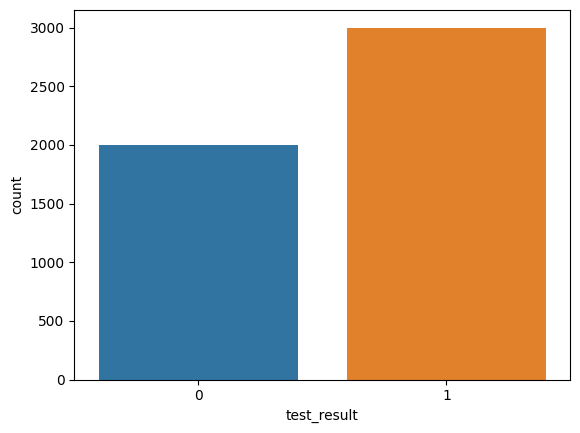

In [7]:
sns.countplot(data=df,x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

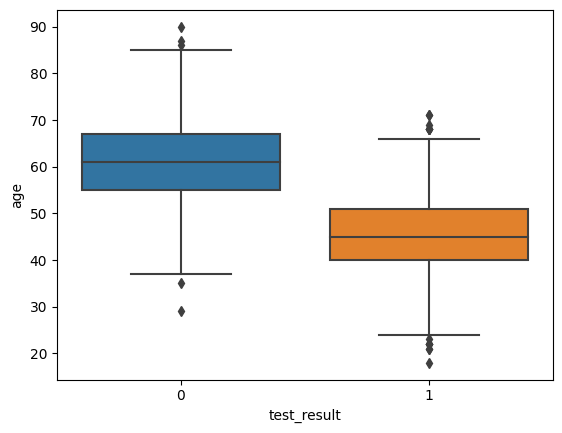

In [8]:
sns.boxplot(x='test_result',y='age',data=df)

<Axes: xlabel='test_result', ylabel='physical_score'>

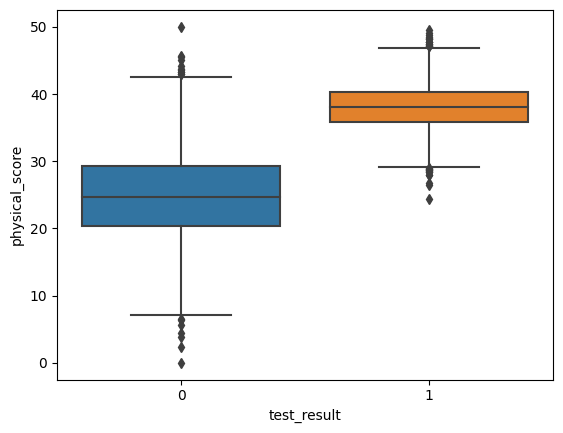

In [9]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<Axes: xlabel='age', ylabel='physical_score'>

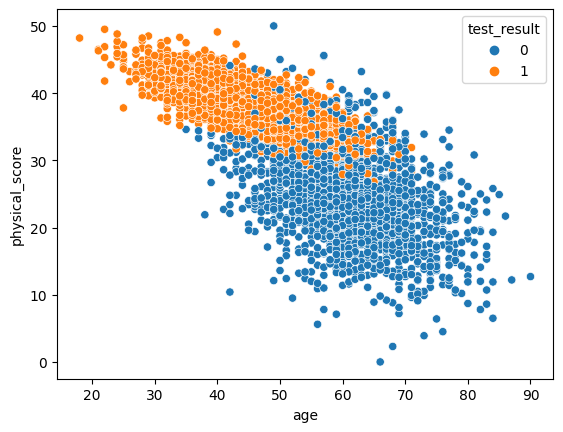

In [10]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

D:\23-trainings\2-Confirmed\7-RPS-Machine-Learning\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


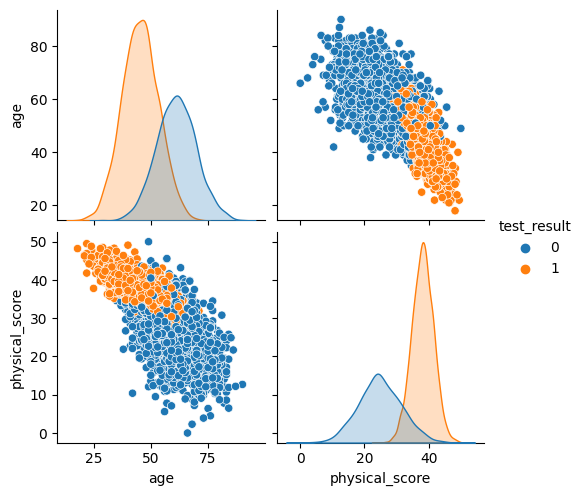

In [11]:
sns.pairplot(df,hue='test_result')

<Axes: >

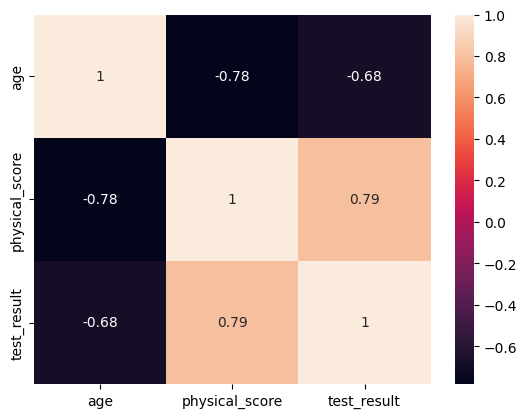

In [12]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

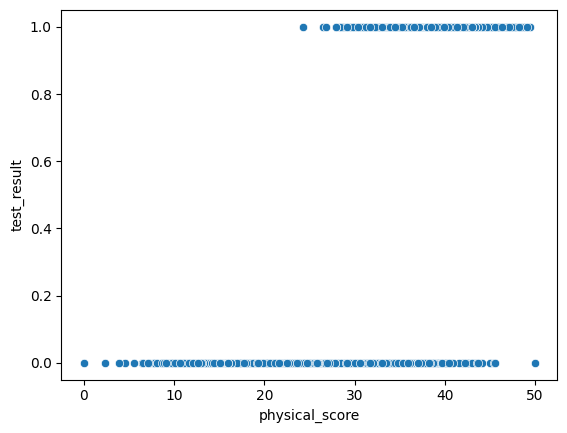

In [13]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

<Axes: xlabel='age', ylabel='test_result'>

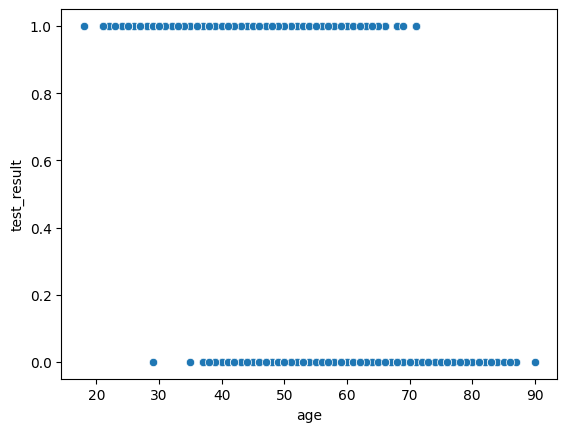

In [14]:
sns.scatterplot(x='age',y='test_result',data=df)

Easily discover new plot types with a google search! Searching for "3d matplotlib scatter plot" quickly takes you to: https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

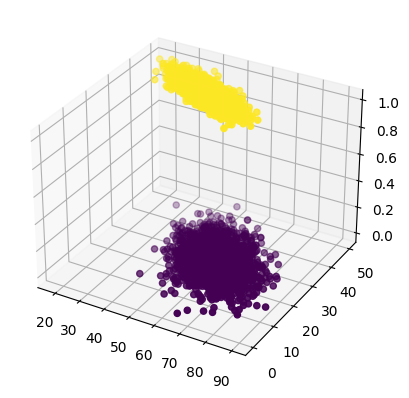

In [15]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

### Train | Test Split and Scaling

In [16]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
# help(LogisticRegression)

In [23]:
# help(LogisticRegressionCV)

In [24]:
log_model = LogisticRegression()

In [25]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [55]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

### Model Performance on Classification Tasks

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [27]:
y_pred = log_model.predict(scaled_X_test)

In [28]:
accuracy_score(y_test,y_pred)

0.93

In [29]:
cm=confusion_matrix(y_test,y_pred)

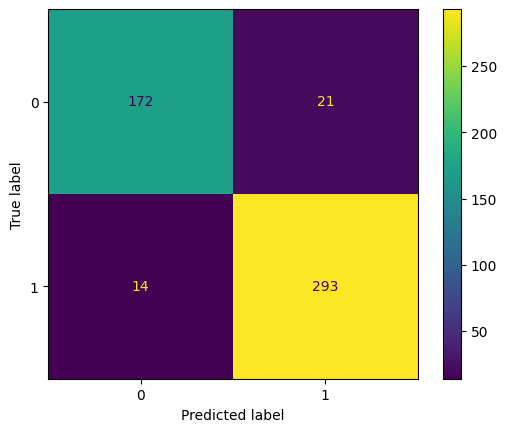

In [30]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [32]:
X_train.iloc[0]

age               32.0
physical_score    43.0
Name: 141, dtype: float64

In [33]:
y_train.iloc[0]

1

In [34]:
# 0% probability of 0 class
# 100% probability of 1 class
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])

In [35]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1], dtype=int64)

## Evaluating Curves and AUC

In [62]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay

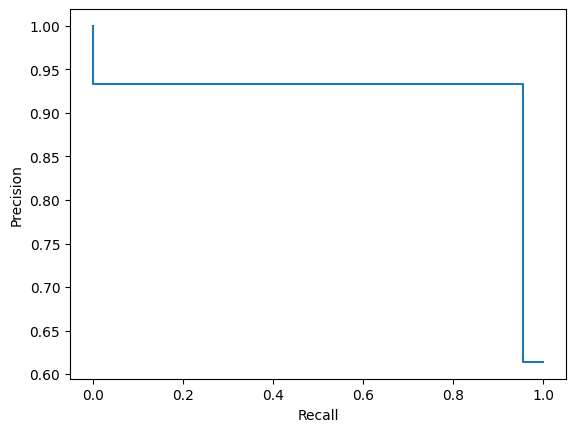

In [63]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision,recall)
disp.plot()

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

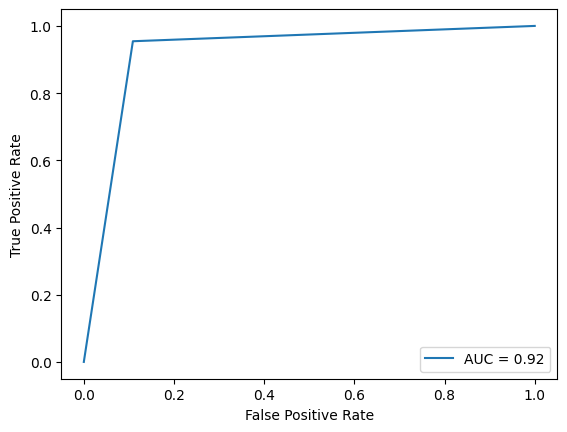

In [66]:
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
disp.plot()

------
------